In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None) 

In [172]:
df = pd.read_csv('data_bike_sharing.csv')

In [173]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


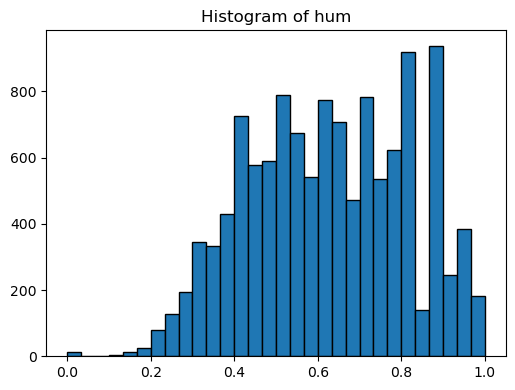

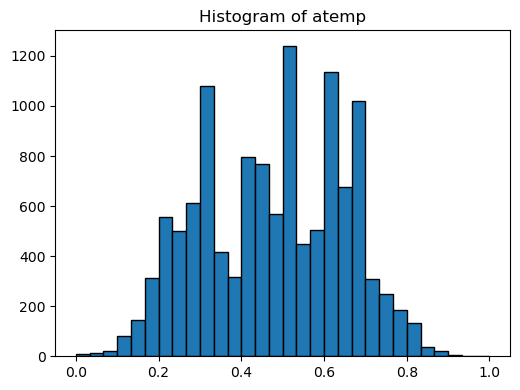

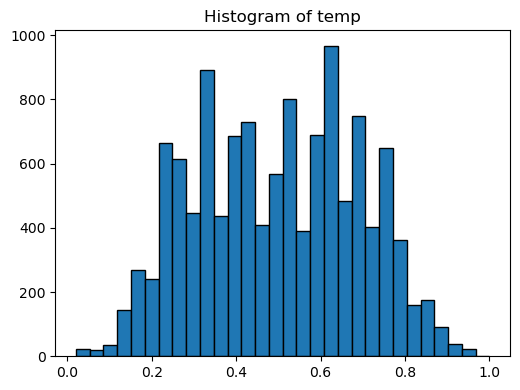

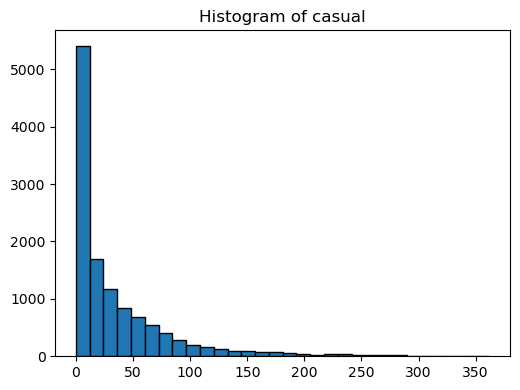

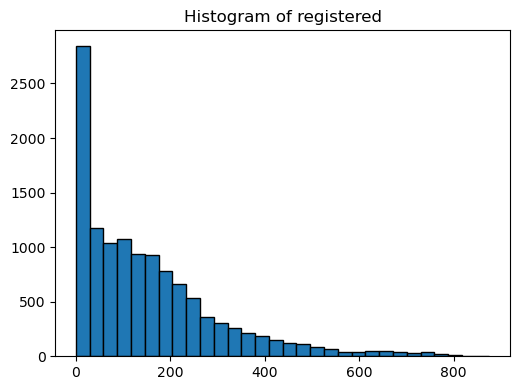

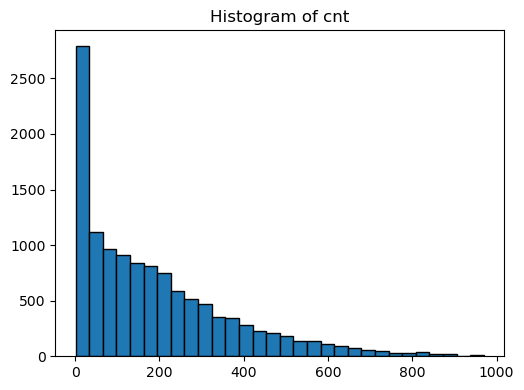

In [174]:


features = ['hum', 'atemp', 'temp', 'casual', 'registered', 'cnt']


for feature in features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[feature], bins=30, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    
    plt.tight_layout()
    plt.show()

In [175]:
df.isnull().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [176]:
df = df.drop(columns=['cnt'])

In [177]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758


In [178]:
X = df[['hum', 'atemp', 'temp', 'season', 'holiday', 'weathersit']]
y_casual = df['casual']  
y_registered = df['registered'] 

X_train_casual, X_test_casual, y_train_casual, y_test_casual = train_test_split(X, y_casual, test_size=0.2, random_state=2020)
X_train_registered, X_test_registered, y_train_registered, y_test_registered = train_test_split(X, y_registered, test_size=0.2, random_state=2020)

In [179]:
df['dteday'] = pd.to_datetime(df['dteday'])

# casual
X_train_casual['dayofweek'] = df.loc[X_train_casual.index, 'dteday'].dt.dayofweek
X_train_casual['year'] = df.loc[X_train_casual.index, 'dteday'].dt.year
X_train_casual['month'] = df.loc[X_train_casual.index, 'dteday'].dt.month
X_train_casual['day'] = df.loc[X_train_casual.index, 'dteday'].dt.day
X_train_casual['hr_sin'] = np.sin(2 * np.pi * df.loc[X_train_casual.index, 'hr'] / 24)
X_train_casual['hr_cos'] = np.cos(2 * np.pi * df.loc[X_train_casual.index, 'hr'] / 24)

X_test_casual['dayofweek'] = df.loc[X_test_casual.index, 'dteday'].dt.dayofweek
X_test_casual['year'] = df.loc[X_test_casual.index, 'dteday'].dt.year
X_test_casual['month'] = df.loc[X_test_casual.index, 'dteday'].dt.month
X_test_casual['day'] = df.loc[X_test_casual.index, 'dteday'].dt.day
X_test_casual['hr_sin'] = np.sin(2 * np.pi * df.loc[X_test_casual.index, 'hr'] / 24)
X_test_casual['hr_cos'] = np.cos(2 * np.pi * df.loc[X_test_casual.index, 'hr'] / 24)

# registered
X_train_registered['dayofweek'] = df.loc[X_train_registered.index, 'dteday'].dt.dayofweek
X_train_registered['year'] = df.loc[X_train_registered.index, 'dteday'].dt.year
X_train_registered['month'] = df.loc[X_train_registered.index, 'dteday'].dt.month
X_train_registered['day'] = df.loc[X_train_registered.index, 'dteday'].dt.day
X_train_registered['hr_sin'] = np.sin(2 * np.pi * df.loc[X_train_registered.index, 'hr'] / 24)
X_train_registered['hr_cos'] = np.cos(2 * np.pi * df.loc[X_train_registered.index, 'hr'] / 24)

X_test_registered['dayofweek'] = df.loc[X_test_registered.index, 'dteday'].dt.dayofweek
X_test_registered['year'] = df.loc[X_test_registered.index, 'dteday'].dt.year
X_test_registered['month'] = df.loc[X_test_registered.index, 'dteday'].dt.month
X_test_registered['day'] = df.loc[X_test_registered.index, 'dteday'].dt.day
X_test_registered['hr_sin'] = np.sin(2 * np.pi * df.loc[X_test_registered.index, 'hr'] / 24)
X_test_registered['hr_cos'] = np.cos(2 * np.pi * df.loc[X_test_registered.index, 'hr'] / 24)

In [180]:
X_train_casual.head()

,hum,atemp,temp,season,holiday,weathersit,dayofweek,year,month,day,hr_sin,hr_cos
8443,0.87,0.3030,0.32,4,0,3,1,2012,11,13,0.965926,-2.588190e-01
10239,0.64,0.5152,0.54,4,0,1,1,2011,10,18,-0.866025,5.000000e-01
11902,0.89,0.5758,0.64,3,0,1,5,2011,7,9,0.500000,8.660254e-01
8920,0.66,0.3333,0.36,4,0,2,0,2012,11,19,1.000000,6.123234e-17
579,0.53,0.8030,0.84,3,0,1,6,2011,7,24,0.258819,-9.659258e-01


In [ ]:
# from sklearn.preprocessing import StandardScaler

# columns_to_scale = ['hum', 'atemp', 'temp']

# casual_scaler = StandardScaler()
# registered_scaler = StandardScaler()

# casual_scaler.fit(X_train_casual[columns_to_scale])
# registered_scaler.fit(X_train_registered[columns_to_scale])

# X_train_casual[columns_to_scale] = casual_scaler.transform(X_train_casual[columns_to_scale])
# X_test_casual[columns_to_scale] = casual_scaler.transform(X_test_casual[columns_to_scale])

# X_train_registered[columns_to_scale] = registered_scaler.transform(X_train_registered[columns_to_scale])
# X_test_registered[columns_to_scale] = registered_scaler.transform(X_test_registered[columns_to_scale])

# X_train_registered.head()

# Scaler not needed based on data

In [182]:
X_train_casual["weathersit"].nunique()

4

In [183]:
X_train_casual.head()

,hum,atemp,temp,season,holiday,weathersit,dayofweek,year,month,day,hr_sin,hr_cos
8443,0.87,0.3030,0.32,4,0,3,1,2012,11,13,0.965926,-2.588190e-01
10239,0.64,0.5152,0.54,4,0,1,1,2011,10,18,-0.866025,5.000000e-01
11902,0.89,0.5758,0.64,3,0,1,5,2011,7,9,0.500000,8.660254e-01
8920,0.66,0.3333,0.36,4,0,2,0,2012,11,19,1.000000,6.123234e-17
579,0.53,0.8030,0.84,3,0,1,6,2011,7,24,0.258819,-9.659258e-01


In [184]:
print(X_train_casual.isnull().sum())
print(X_test_casual.isnull().sum())
print(X_train_registered.isnull().sum())
print(X_test_registered.isnull().sum())

hum           0
atemp         0
temp          0
season        0
holiday       0
weathersit    0
dayofweek     0
year          0
month         0
day           0
hr_sin        0
hr_cos        0
dtype: int64
hum           0
atemp         0
temp          0
season        0
holiday       0
weathersit    0
dayofweek     0
year          0
month         0
day           0
hr_sin        0
hr_cos        0
dtype: int64
hum           0
atemp         0
temp          0
season        0
holiday       0
weathersit    0
dayofweek     0
year          0
month         0
day           0
hr_sin        0
hr_cos        0
dtype: int64
hum           0
atemp         0
temp          0
season        0
holiday       0
weathersit    0
dayofweek     0
year          0
month         0
day           0
hr_sin        0
hr_cos        0
dtype: int64


In [185]:
categorical_features = ['weathersit', 'season']

In [186]:
# casual
X_train_casual_encoded = pd.get_dummies(X_train_casual, columns=categorical_features)
X_test_casual_encoded = pd.get_dummies(X_test_casual, columns=categorical_features)

train_cols = X_train_casual_encoded.columns

X_test_casual_encoded = X_test_casual_encoded.reindex(columns=train_cols, fill_value=0)
X_train_casual_encoded = X_train_casual_encoded.reindex(columns=train_cols, fill_value=0)

for col in X_test_casual_encoded.columns:
    for cat_col in categorical_features:
        if col.startswith(cat_col + '_') and X_test_casual_encoded[col].dtype == 'int64':
            X_test_casual_encoded[col] = X_test_casual_encoded[col].astype(bool)

for col in X_train_casual_encoded.columns:
    for cat_col in categorical_features:
        if col.startswith(cat_col + '_') and X_train_casual_encoded[col].dtype == 'int64':
            X_train_casual_encoded[col] = X_train_casual_encoded[col].astype(bool)


X_train_casual = X_train_casual.drop(categorical_features, axis=1)
X_test_casual = X_test_casual.drop(categorical_features, axis=1)

X_train_casual = pd.concat([X_train_casual_encoded], axis=1)
X_test_casual = pd.concat([X_test_casual_encoded], axis=1) 

In [187]:
# registered
X_train_registered_encoded = pd.get_dummies(X_train_registered, columns=categorical_features)
X_test_registered_encoded = pd.get_dummies(X_test_registered, columns=categorical_features)

train_cols = X_train_registered_encoded.columns

X_test_registered_encoded = X_test_registered_encoded.reindex(columns=train_cols, fill_value=0)
X_train_registered_encoded = X_train_registered_encoded.reindex(columns=train_cols, fill_value=0)

for col in X_test_registered_encoded.columns:
    for cat_col in categorical_features:
        if col.startswith(cat_col + '_') and X_test_registered_encoded[col].dtype == 'int64':
            X_test_registered_encoded[col] = X_test_registered_encoded[col].astype(bool)

for col in X_train_registered_encoded.columns:
    for cat_col in categorical_features:
        if col.startswith(cat_col + '_') and X_train_registered_encoded[col].dtype == 'int64':
            X_train_registered_encoded[col] = X_train_registered_encoded[col].astype(bool)

X_train_registered = X_train_registered.drop(categorical_features, axis=1)
X_test_registered = X_test_registered.drop(categorical_features, axis=1)

X_train_registered = pd.concat([X_train_registered_encoded], axis=1)
X_test_registered = pd.concat([X_test_registered_encoded], axis=1)


In [188]:
X_train_registered.head()

,hum,atemp,temp,holiday,dayofweek,year,month,day,hr_sin,hr_cos,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
8443,0.87,0.3030,0.32,0,1,2012,11,13,0.965926,-2.588190e-01,False,False,True,False,False,False,False,True
10239,0.64,0.5152,0.54,0,1,2011,10,18,-0.866025,5.000000e-01,True,False,False,False,False,False,False,True
11902,0.89,0.5758,0.64,0,5,2011,7,9,0.500000,8.660254e-01,True,False,False,False,False,False,True,False
8920,0.66,0.3333,0.36,0,0,2012,11,19,1.000000,6.123234e-17,False,True,False,False,False,False,False,True
579,0.53,0.8030,0.84,0,6,2011,7,24,0.258819,-9.659258e-01,True,False,False,False,False,False,True,False


In [189]:
X_test_registered.head()

,hum,atemp,temp,holiday,dayofweek,year,month,day,hr_sin,hr_cos,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
5704,0.84,0.6667,0.70,0,6,2012,7,15,0.866025,-5.000000e-01,False,True,False,False,False,False,True,False
8014,0.45,0.6364,0.70,0,1,2011,8,30,-1.000000,-1.836970e-16,True,False,False,False,False,False,True,False
7244,0.70,0.7727,0.78,0,2,2012,9,5,-0.707107,-7.071068e-01,True,False,False,False,False,False,True,False
1394,0.83,0.5758,0.62,0,5,2011,9,24,-0.866025,5.000000e-01,True,False,False,False,False,False,False,True
1809,0.88,0.4545,0.46,0,5,2011,5,21,0.866025,5.000000e-01,True,False,False,False,False,True,False,False


In [190]:
X_train_casual.head()

,hum,atemp,temp,holiday,dayofweek,year,month,day,hr_sin,hr_cos,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
8443,0.87,0.3030,0.32,0,1,2012,11,13,0.965926,-2.588190e-01,False,False,True,False,False,False,False,True
10239,0.64,0.5152,0.54,0,1,2011,10,18,-0.866025,5.000000e-01,True,False,False,False,False,False,False,True
11902,0.89,0.5758,0.64,0,5,2011,7,9,0.500000,8.660254e-01,True,False,False,False,False,False,True,False
8920,0.66,0.3333,0.36,0,0,2012,11,19,1.000000,6.123234e-17,False,True,False,False,False,False,False,True
579,0.53,0.8030,0.84,0,6,2011,7,24,0.258819,-9.659258e-01,True,False,False,False,False,False,True,False


In [191]:
X_test_casual.head()

,hum,atemp,temp,holiday,dayofweek,year,month,day,hr_sin,hr_cos,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
5704,0.84,0.6667,0.70,0,6,2012,7,15,0.866025,-5.000000e-01,False,True,False,False,False,False,True,False
8014,0.45,0.6364,0.70,0,1,2011,8,30,-1.000000,-1.836970e-16,True,False,False,False,False,False,True,False
7244,0.70,0.7727,0.78,0,2,2012,9,5,-0.707107,-7.071068e-01,True,False,False,False,False,False,True,False
1394,0.83,0.5758,0.62,0,5,2011,9,24,-0.866025,5.000000e-01,True,False,False,False,False,False,False,True
1809,0.88,0.4545,0.46,0,5,2011,5,21,0.866025,5.000000e-01,True,False,False,False,False,True,False,False


In [192]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

LINEAR REGRESSION

In [ ]:
casual_model_linear = LinearRegression()

casual_model_linear.fit(X_train_casual, y_train_casual)

y_pred_casual_linear = casual_model_linear.predict(X_test_casual)



In [194]:

mae_casual_linear = mean_absolute_error(y_test_casual, y_pred_casual_linear)

r2_casual_linear = r2_score(y_test_casual, y_pred_casual_linear)

mse_casual_linear = mean_squared_error(y_test_casual, y_pred_casual_linear)


print("Regression Report for casual_model_linear model:")
print("Mean Squared Error:", mse_casual_linear)
print("Mean Absolute Error:", mae_casual_linear)
print("R-squared:", r2_casual_linear)

Regression Report for casual_model_linear model:
Mean Squared Error: 1052.3763259940642
Mean Absolute Error: 22.130924564607785
R-squared: 0.5451234454773588


In [ ]:
cv_scores_linear = cross_val_score(casual_model_linear, X_train_casual, y_train_casual, cv=10, scoring='neg_mean_squared_error')

cv_scores_linear = -cv_scores_linear

print("Cross-validation MSE scores for Linear Regression:", cv_scores_linear)
print("Mean MSE for Linear Regression:", cv_scores_linear.mean())
print("Standard Deviation of MSE for Linear Regression:", cv_scores_linear.std())

Cross-validation MSE scores for Linear Regression: [ 942.10192731 1397.43877982 1166.75924661 1096.885551   1019.64048151
 1216.36987827 1084.42007087 1213.35836857 1036.77422603 1185.86055211]
Mean MSE for Linear Regression: 1135.9609082107768
Standard Deviation of MSE for Linear Regression: 122.22857452624994


In [216]:
param_grid_linear = {
    'fit_intercept': [True, False]
}

In [217]:
grid_search_linear = GridSearchCV(casual_model_linear, param_grid_linear, cv=kfold, 
                                  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search_linear.fit(X_train_casual, y_train_casual)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
best_linear_model = grid_search_linear.best_estimator_
best_linear_rmse = -grid_search_linear.best_score_
best_linear_params = grid_search_linear.best_params_

print("Best RMSE for Linear Regression:", best_linear_rmse)
print("Best hyperparameters for Linear Regression:", best_linear_params)

#  data too many zeroes

Best RMSE for Linear Regression: 1135.8316737664427
Best hyperparameters for Linear Regression: {'fit_intercept': True}


DECISION TREE REGRESSOR

In [196]:
casual_model_tree = DecisionTreeRegressor(random_state=2020)

casual_model_tree.fit(X_train_casual, y_train_casual)

y_pred_casual_tree = casual_model_tree.predict(X_test_casual)

In [197]:
mse_casual_tree = mean_squared_error(y_test_casual, y_pred_casual_tree)

mae_casual_tree = mean_absolute_error(y_test_casual, y_pred_casual_tree)

r2_casual_tree = r2_score(y_test_casual, y_pred_casual_tree)

print("Regression Report for casual_model_tree model:")
print("Mean Squared Error:", mse_casual_tree)
print("Mean Absolute Error:", mae_casual_tree)
print("R-squared:", r2_casual_tree)

Regression Report for casual_model_tree model:
Mean Squared Error: 410.5992601726264
Mean Absolute Error: 11.580764488286066
R-squared: 0.8225235857710436


In [ ]:
param_grid_tree = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [5, 10, 15, 20],  
    'min_samples_leaf': [2, 4, 6, 8],     
    'max_features': ['sqrt', 'log2']      
}

In [199]:
grid_search_tree = GridSearchCV(casual_model_tree, param_grid_tree, cv=kfold, 
                                scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search_tree.fit(X_train_casual, y_train_casual)

best_tree_model = grid_search_tree.best_estimator_
best_tree_rmse = -grid_search_tree.best_score_
best_tree_params = grid_search_tree.best_params_

print("Best RMSE for Decision Tree:", best_tree_rmse)
print("Best hyperparameters for Decision Tree:", best_tree_params)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best RMSE for Decision Tree: 534.7225817101338
Best hyperparameters for Decision Tree: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20}


In [ ]:
cv_scores_best = cross_val_score(best_tree_model, X_train_casual, y_train_casual, cv=10, scoring='neg_mean_squared_error')

cv_scores_best = -cv_scores_best

print("Cross-validation MSE scores for Best Model:", cv_scores_best)
print("Mean MSE for Best Model:", cv_scores_best.mean())
print("Standard Deviation of MSE for Best Model:", cv_scores_best.std())

Cross-validation MSE scores for Best Model: [548.12809137 632.42151462 523.66434527 649.97379033 732.81745885
 727.54281507 470.25086571 622.87126785 533.37453318 773.90620335]
Mean MSE for Best Model: 621.4950885590972
Standard Deviation of MSE for Best Model: 96.64050563048974


In [ ]:
y_pred_best = best_tree_model.predict(X_test_casual)

rmse_best = np.sqrt(mean_squared_error(y_test_casual, y_pred_best))

mae_best = mean_absolute_error(y_test_casual, y_pred_best)

r2_best = r2_score(y_test_casual, y_pred_best)

print("RMSE (Test Set):", rmse_best)
print("MAE (Test Set):", mae_best)
print("R-squared (Test Set):", r2_best)

RMSE (Test Set): 22.983703314008807
MAE (Test Set): 13.121474635196842
R-squared (Test Set): 0.7716702522500012


RANDOM FOREST REGRESSOR

In [ ]:
casual_model_rf = RandomForestRegressor(n_estimators=100, random_state=2020)

casual_model_rf.fit(X_train_casual, y_train_casual)

RandomForestRegressor(random_state=2020)

In [ ]:
y_pred_casual_rf = casual_model_rf.predict(X_test_casual)

mse_casual_rf = mean_squared_error(y_test_casual, y_pred_casual_rf)

mae_casual_rf = mean_absolute_error(y_test_casual, y_pred_casual_rf)

r2_casual_rf = r2_score(y_test_casual, y_pred_casual_rf)

precision_casual_rf = np.mean(y_pred_casual_rf == y_test_casual)
recall_casual_rf = np.mean(y_pred_casual_rf[y_test_casual == 1] == 1)

print("Regression Report for casual_model_rf model:")
print("Mean Squared Error:", mse_casual_rf)
print("Mean Absolute Error:", mae_casual_rf)
print("R-squared:", r2_casual_rf)


Regression Report for casual_model_rf model:
Mean Squared Error: 203.14623530620634
Mean Absolute Error: 8.37650226058364
R-squared: 0.9121925709483757


In [204]:

cv_scores = cross_val_score(casual_model_rf, X_train_casual, y_train_casual, cv=10, scoring='neg_mean_squared_error')

cv_scores = -cv_scores

print("Cross-validation MSE scores:", cv_scores)
print("Mean MSE:", cv_scores.mean())  #higher than train test split means overfitting
print("Standard Deviation of MSE:", cv_scores.std()) #overfitting

Cross-validation MSE scores: [217.07632033 260.30998398 230.5979036  246.53619692 227.47329753
 293.80880822 195.4399964  281.23780596 194.28040689 216.28782076]
Mean MSE: 236.3048540591663
Standard Deviation of MSE: 32.13032229462271


In [ ]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 4, 8], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True] 
}

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2020)

grid_search = GridSearchCV(casual_model_rf, param_grid, cv=kfold, 
                           scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train_casual, y_train_casual)

best_rf_model = grid_search.best_estimator_
best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_

print("Best RMSE:", best_rmse)
print("Best hyperparameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RMSE: 16.543524192479705
Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [207]:
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_casual.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)

         Feature    Importance
4      dayofweek  1.912250e-01
9         hr_cos  1.800052e-01
1          atemp  1.498276e-01
8         hr_sin  1.183211e-01
2           temp  1.095458e-01
0            hum  8.882603e-02
6          month  3.929014e-02
7            day  3.178251e-02
5           year  3.110060e-02
14      season_1  1.440098e-02
3        holiday  1.156096e-02
16      season_3  8.090220e-03
15      season_2  6.879686e-03
10  weathersit_1  6.494776e-03
17      season_4  4.747643e-03
12  weathersit_3  4.292505e-03
11  weathersit_2  3.609281e-03
13  weathersit_4  4.568626e-09


In [237]:
y_pred_casual_rf_best = best_rf_model.predict(X_test_casual)

mse = mean_squared_error(y_test_casual, y_pred_casual_rf_best)
mae = mean_absolute_error(y_test_casual, y_pred_casual_rf_best)
r2 = r2_score(y_test_casual, y_pred_casual_rf_best)

print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("MAE:", mae)
print("R-squared:", r2)

MSE: 237.91166702736984
RMSE: 15.4243854667656
MAE: 9.129017309664624
R-squared: 0.8971656462568902


In [238]:
cv_scores_best = cross_val_score(best_rf_model, X_train_casual, y_train_casual, cv=10, scoring='neg_mean_squared_error')

cv_scores_best = -cv_scores_best

print("Cross-validation MSE scores for Best Model:", cv_scores_best)
print("Mean MSE for Best Model:", cv_scores_best.mean())
print("Mean RMSE for Best Model:", np.sqrt(cv_scores_best.mean()))
print("Standard Deviation of MSE for Best Model:", cv_scores_best.std())

Cross-validation MSE scores for Best Model: [252.96932502 297.32809133 257.53516063 283.70007904 222.93382737
 337.03412944 229.03365657 296.25589082 215.59309806 259.80054534]
Mean MSE for Best Model: 265.21838036176985
Mean RMSE for Best Model: 16.28552671428744
Standard Deviation of MSE for Best Model: 36.457984111883455


In [240]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    non_zero_indices = y_true != 0  
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape_best_rf = mean_absolute_percentage_error(y_test_casual, y_pred_casual_rf_best)
print("MAPE for Best casual Random Forest Model:", mape_best_rf)

MAPE for Best casual Random Forest Model: 71.95624466521915


In [241]:
mape_rf = mean_absolute_percentage_error(y_test_casual, y_pred_casual_rf)
print("MAPE for Best casual Random Forest Model:", mape_rf)

MAPE for Best casual Random Forest Model: 58.35910080748478


RANDOM FOREST REGRESSION BUT FOR REGISTERED

In [219]:
registered_model_rf = RandomForestRegressor(n_estimators=100, random_state=2020)

registered_model_rf.fit(X_train_registered, y_train_registered)

RandomForestRegressor(random_state=2020)

In [220]:
y_pred_registered_rf = registered_model_rf.predict(X_test_registered)

mse_registered_rf = mean_squared_error(y_test_registered, y_pred_registered_rf)
mae_registered_rf = mean_absolute_error(y_test_registered, y_pred_registered_rf)
r2_registered_rf = r2_score(y_test_registered, y_pred_registered_rf)

print("Regression Report for registered_model_rf model:")
print("Mean Squared Error:", mse_registered_rf)
print("Root Mean Squared Error:", np.sqrt(mse_registered_rf))
print("Mean Absolute Error:", mae_registered_rf)
print("R-squared:", r2_registered_rf)

Regression Report for registered_model_rf model:
Mean Squared Error: 1297.377820920674
Root Mean Squared Error: 36.01913131824078
Mean Absolute Error: 21.071200164406083
R-squared: 0.9425610930462178


In [221]:
cv_scores_registered_rf = cross_val_score(registered_model_rf, X_train_registered, y_train_registered, cv=10, scoring='neg_mean_squared_error')

cv_scores_registered_rf = -cv_scores_registered_rf

print("Cross-validation MSE scores for Registered Random Forest:", cv_scores_registered_rf)
print("Mean MSE for Registered Random Forest:", cv_scores_registered_rf.mean())
print("Root Mean MSE for Registered Random Forest:", np.sqrt(cv_scores_registered_rf.mean()))
print("Standard Deviation of MSE for Registered Random Forest:", cv_scores_registered_rf.std())

Cross-validation MSE scores for Registered Random Forest: [1859.62882084 1213.99964805 1635.29565067 1126.02109229 1280.94068058
 1187.87080647 1362.79333196 1678.84962662 1265.10978602 1391.92815766]
Mean MSE for Registered Random Forest: 1400.2437601162496
Root Mean MSE for Registered Random Forest: 37.4198311075324
Standard Deviation of MSE for Registered Random Forest: 230.83729463445232


In [233]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) 
    non_zero_indices = y_true != 0  
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

mape_registered_rf = mean_absolute_percentage_error(y_test_registered, y_pred_registered_rf)
print("MAPE for Registered Random Forest:", mape_registered_rf)

MAPE for Registered Random Forest: 30.320451212215797


In [228]:
y_test_casual.head()

5704    37
8014    60
7244    41
1394    77
1809     1
Name: casual, dtype: int64

In [229]:
y_test_registered.head()

5704     96
8014    516
7244    204
1394    166
1809      6
Name: registered, dtype: int64